<a href="https://colab.research.google.com/github/habash2125/diamonds-project/blob/main/tweets_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import tweepy as tw 
import regex as re
from bs4 import BeautifulSoup
import nltk
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization, CuDNNGRU, CuDNNLSTM,GRU,Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
file = open("/content/drive/MyDrive/Colab Notebooks/twitter sentiment analysis/twitter api keys.txt")
keys=file.read().splitlines()
type(keys)

list

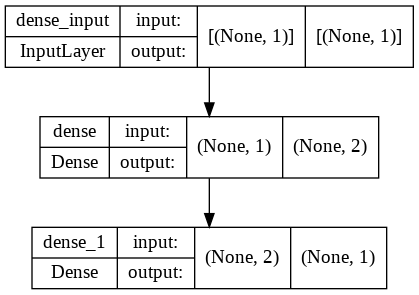

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

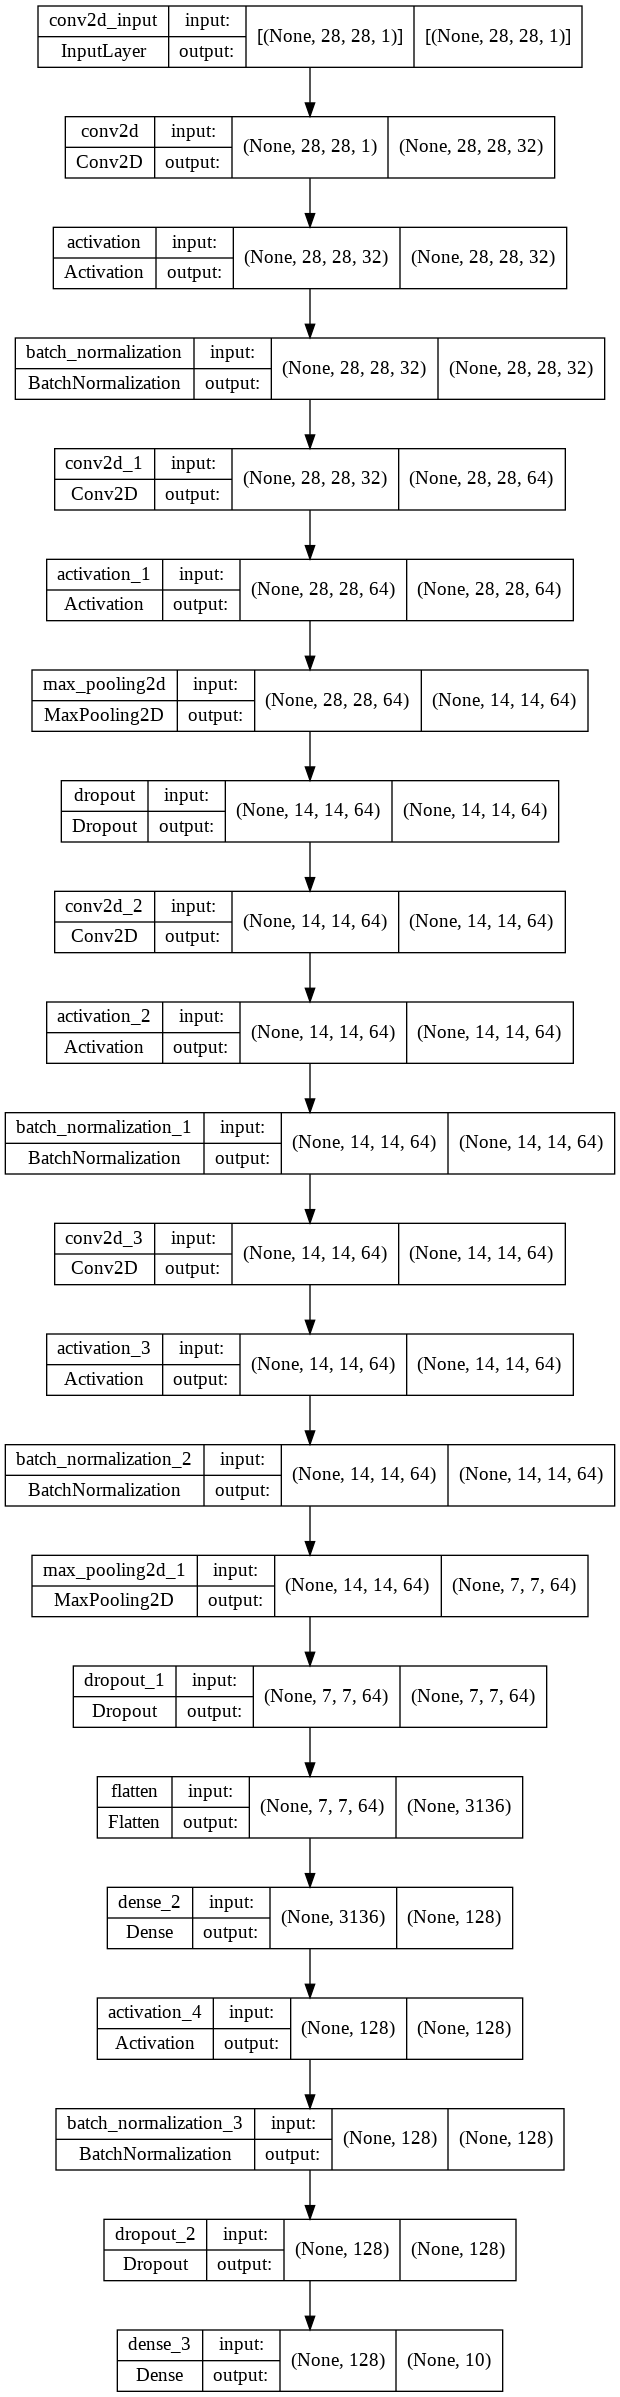

In [ ]:
      from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization ,Flatten,Dense, Activation,Dropout

      model = Sequential()

      model.add(Conv2D(32, (5,5), input_shape=(28, 28, 1),padding="same"))
      model.add(Activation('relu'))
      model.add(BatchNormalization())

      model.add(Conv2D(64,  (5,5) , padding = 'same'))
      model.add(Activation('relu'))
      model.add(MaxPool2D(pool_size=(2,2)))
      model.add(Dropout(0.20))

      model.add(Conv2D(64, (3,3),padding = 'same'))
      model.add(Activation('relu'))
      model.add(BatchNormalization())


      model.add(Conv2D(64,  (3,3), padding = 'same'))
      model.add(Activation('relu'))
      model.add(BatchNormalization())
      model.add(MaxPool2D(pool_size=(2,2)))
      model.add(Dropout(0.20))

      model.add(Flatten())

      model.add(Dense(128))
      model.add(Activation('relu'))
      model.add(BatchNormalization())
      model.add(Dropout(0.5))
      model.add(Dense(10, activation='softmax'))
      
      
      model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
      plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
api_key=keys[1]
api_secret_key=keys[4]
bearer_token=keys[7]
access_token=keys[10]
access_token_secret=keys[13]


In [ ]:
auth = tw.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth)

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

type(public_tweets)

[satire]
RT @Toonzatt: وانا بحاول معملش ازعاج الساعه 3 الفجر: https://t.co/DLD9YkIpBk
now that I finished our beloved summer I realized how much I love them:((((((((((((((((( https://t.co/mWou1gd4sC
And I'll tell you a million little reasons falling for your eyes
All #Italy, every day! Join our online community to ask any questions you might have about travel, life in Italy, o… https://t.co/uNyBmetnoq
Uncover the dark history behind the creation of Mount Rushmore: https://t.co/FGDBiHsUPh
RT @Mohamed16311031: بس انا موڤد اون برضو https://t.co/s9OezanWyk
RT @mahmooud_1: عندي فوبيا اِسمها خايف أكون تقيل على اللي قُدامي!
It doesn't matter when you're goin' if you're gone
Nothing feels the same these days it all went wrong
Now I just d… https://t.co/5Isr32Kj2N
يووووه شو حصل https://t.co/KcxwRo6KiY
RT @AbdallahMarouf: لماذا يستعجل البعض الحرب فيطلقون وسم #الحرب_العالمية_الثالثة ثم يضحكون ويتندرون وكأنهم يتكلمون عن لعبة لا لعنة؟؟! 
هل ي…
احس ما في مجال حيطلعوا معي يعني حيطلعوا معي
يا رب استره

tweepy.models.ResultSet

In [ ]:
  search_word=["#Shang-Chi"]

  posts=api.search(q=search_word,lang="en",count=200)
  posts.count

  tweets_text=pd.DataFrame( [tweet.text for tweet in posts])
  tweets_text.head()

,0
0,@DetroitHater @CartwheelGalexy @LucPeabody I k...
1,@Notbryaaaan @snyder_all Released years after ...
2,"@GailSimone Dr. Strange, Captain Marvel, Shang..."
3,Okay we gonna watch Eternals now since my boyf...
4,RT @MCU_Direct: #ShangChi actor Simu Liu says ...


In [ ]:
tweets_list = tw.Cursor(api.search, q=search_word, lang='en').items()
type(tweets_list)

tweepy.cursor.ItemIterator

In [ ]:
i=0
#for t in tweets_list.num_tweets:
 # i+=1
i
tweets_list.num_tweets

0

In [ ]:
# we will be right back -comercials music-

In [ ]:
imdb_data=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/twitter sentiment analysis/IMDB Dataset.csv")
raw_data=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/twitter sentiment analysis/IMDB Dataset.csv")


In [ ]:
imdb_data['review'][0]


"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
imdb_data['sentiment'][0]

'positive'

In [ ]:
imdb_data['sentiment'].replace("positive",1,inplace=True)
imdb_data['sentiment'].replace("negative",0,inplace=True)

In [ ]:
from nltk.corpus import stopwords 
nltk.download('stopwords')
stop_words=stopwords.words('english')

from nltk.stem import PorterStemmer
porter =PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def html_cleaner(text):
  soup=BeautifulSoup(text,'html.parser')
  return soup.get_text()

def links_tags_cleaner(text):
  link="http\S+"
  tag="@\S+"
  retweet="RT\s"
  text=re.sub(link,"",text)
  text=re.sub(retweet,"",text)
  text=re.sub(tag,"",text)
  return text

def special_chars_cleaner(text):
  not_specials="[^A-Za-z\s]"
  list_words=[]
  for words in text:
    list_words.append(re.sub(not_specials," ", words))
  return list_words

def stop_words_cleaner(text):
  clean_words=[]
  words=text.split()
  for word in words:
    if word not in stop_words:
      clean_words.append(word)
  return clean_words

def words_stemmer(text):
  
  stemmed_text=''
  #words_list=text.split()
  for word in text:
    stemmed_text=stemmed_text +' '+porter.stem(word)

  return stemmed_text

def one_letter_cleanner(text):
  #list_words=[]
  #for words in text:
    #list_words.append(re.sub("\s\S\s","", words))
  text=re.sub("\s\S\s","", text)
  text=re.sub("\setc\s","", text)
  return text

def text_cleaner(text):
  text=html_cleaner(text)
  text=text.lower()
  text=one_letter_cleanner(text)
  text=links_tags_cleaner(text)
  text=stop_words_cleaner(text)
  text=special_chars_cleaner(text)
  text=words_stemmer(text)
  text=one_letter_cleanner(text)
  return text

In [ ]:
imdb_data['review'][147]

"Francis Ford Coppola wrote and directed this stunningly personal story of a married woman's flight from her husband--and the reality that perhaps the youthful glee and excitement of her younger years are behind her. We learn little about this woman's marriage except that she has been feeling her independence slipping away as of late; she's also recently learned she's pregnant, which has further complicated her heart (she doesn't want to be a complacent wifey, despite the maternal way she speaks to her husband over the phone). She meets two men on her journey: a former college football hero who--after an accident during a game--has been left with permanent brain damage, and a sexy, strutting motorcycle cop who has a great deal of trouble in his own life. The clear, clean landscapes (as photographed by the very talented Wilmer Butler) are astutely realized, as are the characters. Shirley Knight, James Caan, and Robert Duvall each deliver strong, gripping performances, most especially si

In [ ]:
x=text_cleaner(imdb_data['review'][147])
x

' franci ford coppola wrote direct stunningli person stori ofmarri woman  flight husband  and realiti perhap youth glee excit younger year behind her  learn littl woman  marriag except feel independ slip away late  also recent learn pregnant  complic heart  she want becomplac wifey  despit matern way speak husband phone   meet two men journey form colleg footbal hero who  aft accid duringgame  ha left perman brain damage  andsexy  strut motorcycl cop hasgreat deal troubl life  clear  clean landscap photograph talent wilmer butler  astut realized  characters  shirley knight  jame caan  robert duval deliv strong  grip performances  especi sinc likabl peopl convent terms  scene  such knight  first call home frompay phone  first night alon caan play  simon says   almost intim watch  coppola toy reality  turn jag memori charact scrapbook wemade privi to  allow scene play out  yet edit quit nimbl film never allow get heavi  there least two three friski moments   it sheadi endeavor  so much p

In [ ]:
clean_reviews=imdb_data['review'].apply(text_cleaner)

In [ ]:
imdb_data.drop('review',axis=1)
imdb_data['review']=clean_reviews

In [ ]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(imdb_data['review'])


In [ ]:
type(tokenizer.index_word)

dict

In [ ]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [ ]:
train=imdb_data[:40000]
test=imdb_data[40000:]
x_train=train['review']
x_test=test['review']
y_train=train['sentiment']
y_test=test['sentiment']
type(x_train)

pandas.core.series.Series

In [ ]:
x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)
len(x_train_tokens)

40000

In [ ]:
#x_train_tokens[0]

In [ ]:
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
print(np.mean(num_tokens))
print(np.max(num_tokens))


105.18748
1079


In [ ]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens 

261

In [ ]:
pad='pre'
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens,padding=pad, truncating=pad)
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens,padding=pad, truncating=pad)


In [ ]:
x_train_pad.shape

(40000, 261)

**model time !!!**

In [ ]:
embed_dim = 128
embedding_size = 8

lstm_out = 196

model = Sequential()


model.add(Embedding(input_dim=num_words,output_dim=embedding_size,input_length=max_tokens,name='layer_embedding'))
model.add(CuDNNGRU(units=16, return_sequences=True))
model.add(Dropout(0.2))
model.add(CuDNNGRU(units=8, return_sequences=True))
model.add(Dropout(0.2))


model.add(CuDNNGRU(units=4))
model.add(Dropout(0.2))


#model.add(CuDNNLSTM(64))

model.add(Dense(32,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy',patience=2)


In [ ]:
type(x_train)

pandas.core.series.Series

In [ ]:
history=model.fit(x_train_pad, y_train,validation_data = (x_test_pad,y_test),epochs = 10, batch_size=128,callbacks=[early_stopping])


Epoch 1/10
313/313 [==============================] - 56s 178ms/step - loss: 0.1818 - accuracy: 0.9388 - val_loss: 0.3215 - val_accuracy: 0.8776
Epoch 2/10
313/313 [==============================] - 56s 178ms/step - loss: 0.1670 - accuracy: 0.9460 - val_loss: 0.3407 - val_accuracy: 0.8787
Epoch 3/10
313/313 [==============================] - 56s 178ms/step - loss: 0.1524 - accuracy: 0.9508 - val_loss: 0.3491 - val_accuracy: 0.8721
Epoch 4/10
313/313 [==============================] - 56s 179ms/step - loss: 0.1458 - accuracy: 0.9533 - val_loss: 0.3780 - val_accuracy: 0.8756


In [ ]:
model.evaluate(x_test_pad,y_test)

313/313 [==============================] - 21s 65ms/step - loss: 0.3780 - accuracy: 0.8756


[0.3780392110347748, 0.8755999803543091]

In [ ]:
preds=model.predict(x_test_pad)

In [ ]:
final_preds=np.array([1.0 if p>0.5 else 0.0 for p in preds])

In [ ]:
final_preds

array([0., 0., 1., ..., 0., 1., 0.])

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, final_preds)
print(matrix)

[[4505  488]
 [ 756 4251]]


In [ ]:
 search_word=["#Shang-Chi"]

  posts=api.search(q=search_word,lang="en",count=200)
  posts.count

  tweets_text=pd.DataFrame( [tweet.text for tweet in posts])
  tweets_text.head()

In [ ]:
twitter_data=tweets_text[0].apply(text_cleaner)
twitter_data.head()

0                                Xu xial end shang chi
1     envi spoke simu liu star marvel shangchi lege...
2     shang chi wa amaz ive actual read comic I kno...
3     shang chi great littl bit uninterest make sen...
4     the xbox marvel hero collab youv wait follow ...
Name: 0, dtype: object

In [ ]:
twitter_data.head()

0                                Xu xial end shang chi
1     envi spoke simu liu star marvel shangchi lege...
2     shang chi wa amaz ive actual read comic I kno...
3     shang chi great littl bit uninterest make sen...
4     the xbox marvel hero collab youv wait follow ...
Name: 0, dtype: object

In [ ]:
twitter_tokens = tokenizer.texts_to_sequences(twitter_data)


In [ ]:
twitter_pad=pad_sequences(twitter_tokens, maxlen=max_tokens,padding=pad, truncating=pad)

In [ ]:
rating=model.predict(twitter_pad)

In [ ]:
len(rating)

100

In [ ]:
sum=0;
for rate in rating:
  if rate>0.5:
    sum+=1
sum

77

In [ ]:
print(sum/100)

0.77


In [ ]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


In [ ]:
full=''
for x in twitter_data:
  full+=x


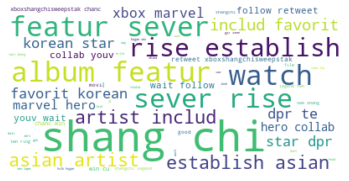

In [ ]:

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(full)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()